In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Data Loading

In [132]:
data = pd.read_csv('personality_dataset.csv')

data.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


# EDA

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [134]:
data.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [135]:
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [136]:
data.shape

(2900, 8)

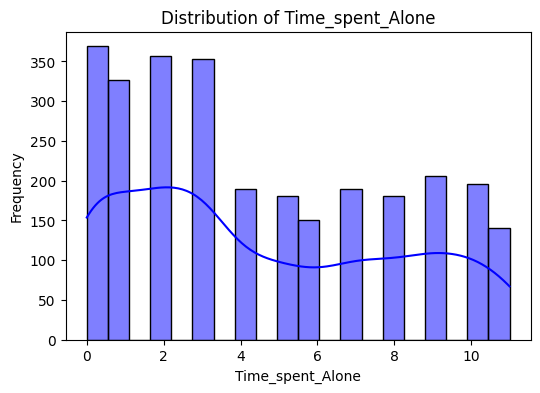

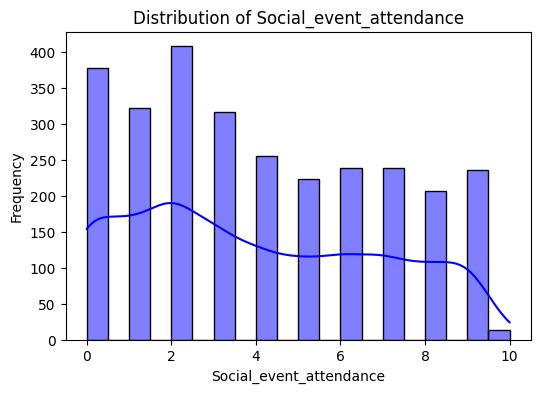

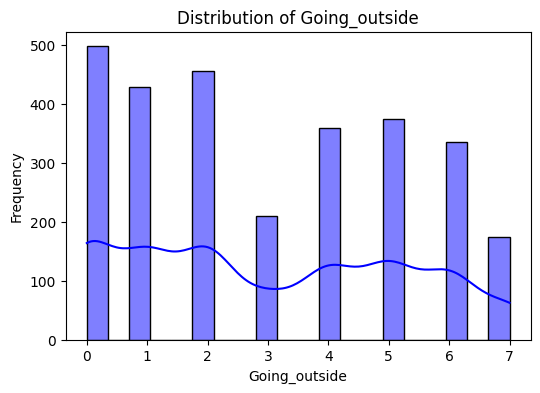

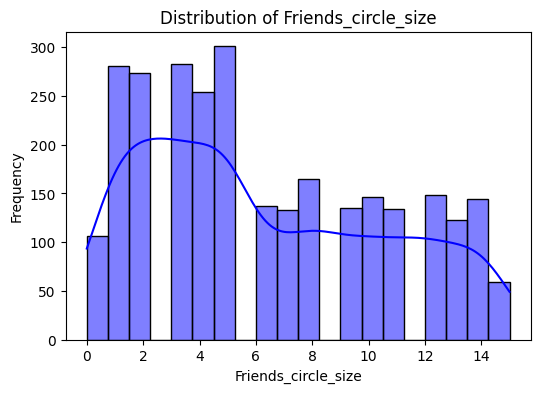

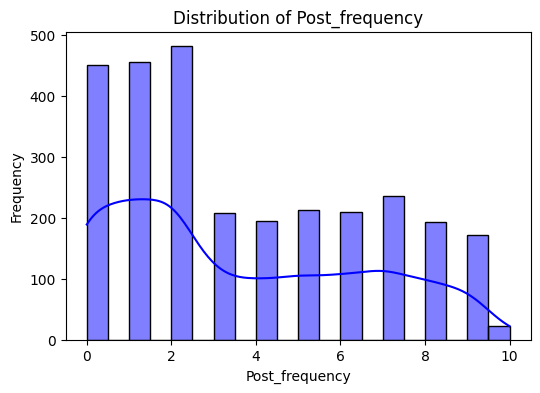

In [137]:
num_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in num_columns:
    plt.figure(figsize=(6, 4))
    sb.histplot(data[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')


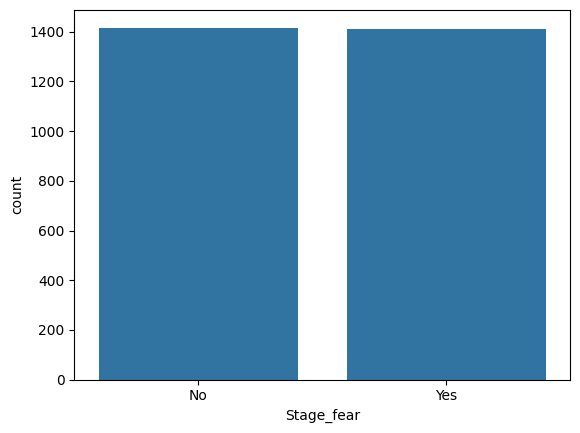

In [138]:
cat_columns = data.select_dtypes(include=['object']).columns

sb.countplot(x=data['Stage_fear'])
print(cat_columns)

<Axes: xlabel='Drained_after_socializing', ylabel='count'>

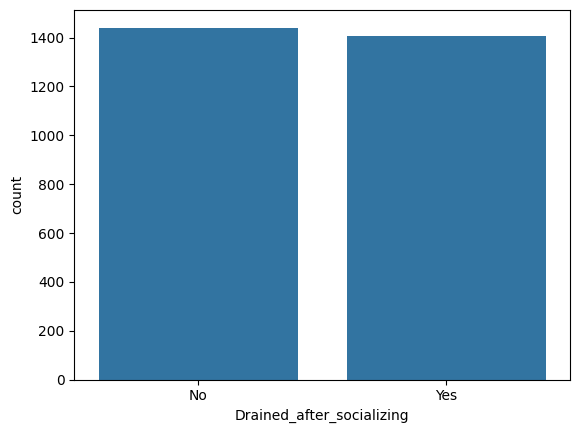

In [139]:
sb.countplot(x=data['Drained_after_socializing'])

<Axes: xlabel='Personality', ylabel='count'>

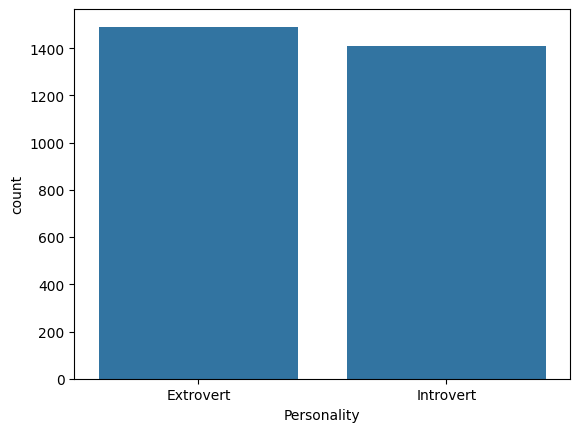

In [140]:
sb.countplot(x=data['Personality'])

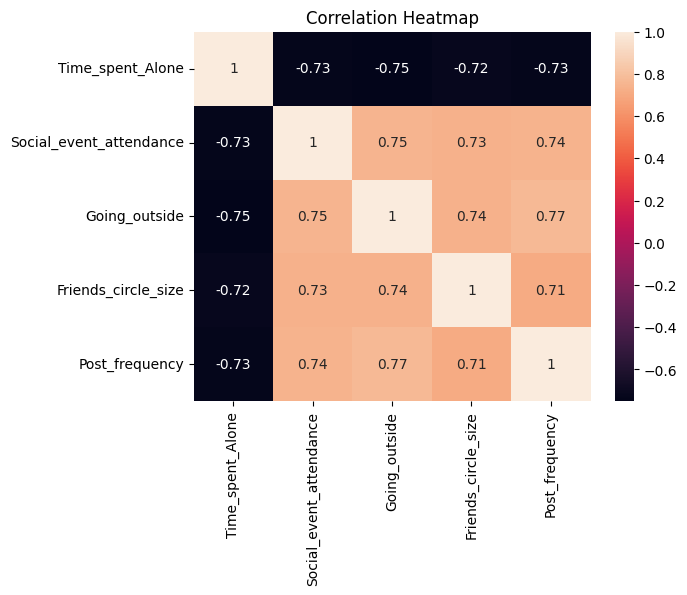

In [141]:
correlation_matrix = data[num_columns].corr()
sb.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [142]:
# To display all duplicate rows
data[data.duplicated(keep=False)]

# Returns a boolean Series indicating duplicate rows
data.duplicated()

# To get the count of duplicate rows
data.duplicated().sum()


np.int64(388)

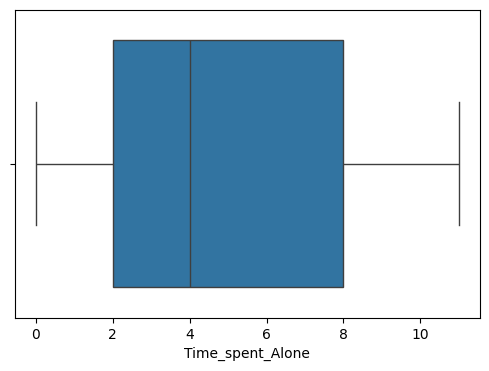

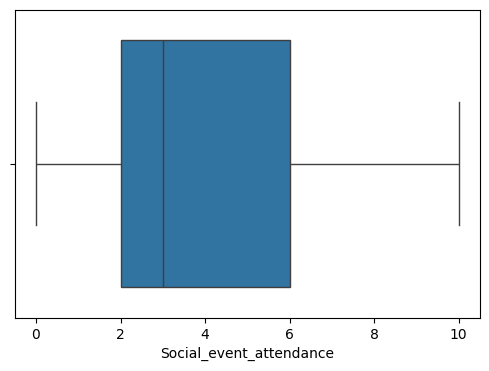

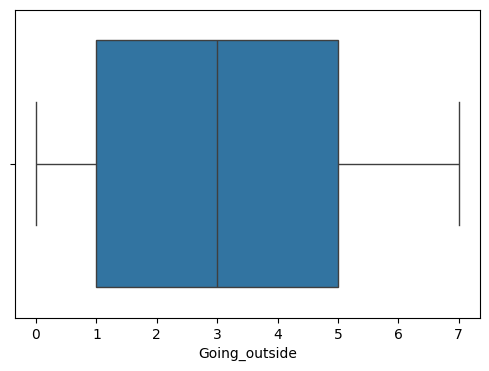

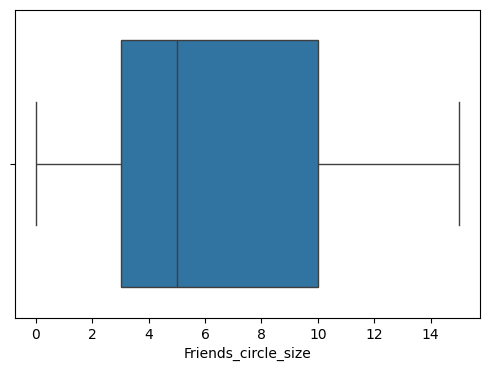

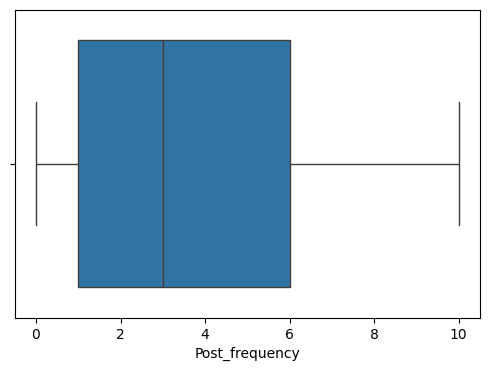

In [143]:
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sb.boxplot(x=data[col])
    plt.show()

# Data Cleaning and Preprocessing

In [144]:
data.drop_duplicates(inplace=True)

In [145]:
data.shape

(2512, 8)

In [146]:
# Handling missing value
data.isnull().sum()

Time_spent_Alone             61
Stage_fear                   73
Social_event_attendance      61
Going_outside                65
Drained_after_socializing    51
Friends_circle_size          75
Post_frequency               63
Personality                   0
dtype: int64

In [147]:
print(num_columns)

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')


In [148]:
for num_col in num_columns:
    data.fillna({num_col: data[num_col].mean()}, inplace=True)

In [149]:
data['Personality'].value_counts()


Personality
Extrovert    1417
Introvert    1095
Name: count, dtype: int64

In [150]:
# filling null values in categorical columns
for column_cat in cat_columns:
    data.fillna({column_cat: data[column_cat].mode()[0]}, inplace=True)

In [151]:
# Now Let's do Encoding

data['Stage_fear'] = data['Stage_fear'].map({'Yes': 1, 'No': 0})
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Perform label encoding on the 'Personality' column
le = LabelEncoder()
data['Personality'] = le.fit_transform(data['Personality'])
data.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


# Feature Engineering and Extraction

In [152]:
# Feature Scaling
scaler = StandardScaler()
columns_to_scale = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [153]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.061497,0,-0.076262,1.261784,0,1.501153,0.401335,0
1,1.407602,1,-1.468569,-1.445833,1,-1.551548,-0.285506,1
2,1.407602,1,-1.120492,-0.543294,1,-0.377432,-0.628927,1
3,-1.236776,0,0.619892,1.713054,0,1.735976,1.431598,0
4,-0.355317,0,1.664123,0.359245,0,0.327037,0.401335,0


Pearson correlation between Time_spent_Alone and Personality: 0.70
Pearson correlation between Social_event_attendance and Personality: -0.70
Pearson correlation between Going_outside and Personality: -0.71
Pearson correlation between Friends_circle_size and Personality: -0.66
Pearson correlation between Post_frequency and Personality: -0.69


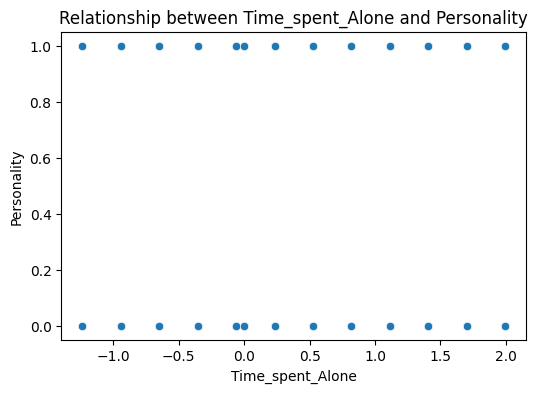

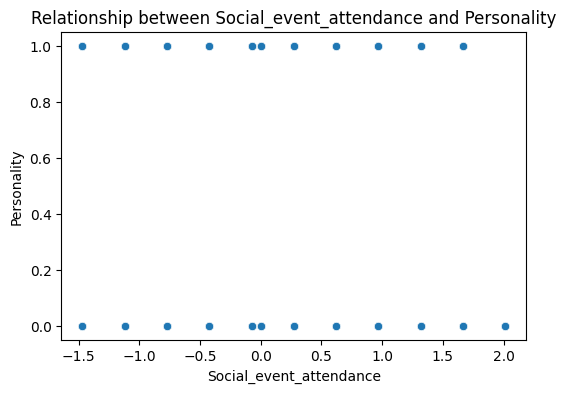

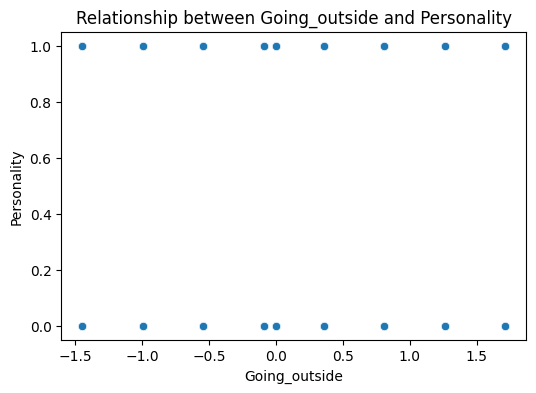

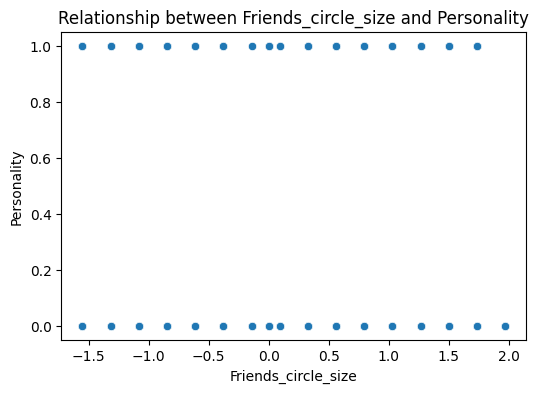

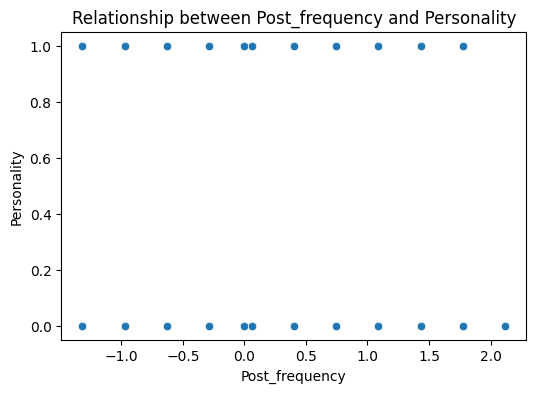

In [154]:
# Checking correleation using pearsonr

feature_column = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
target_column = 'Personality'
for feature in feature_column:
    corr, _ = pearsonr(data[feature], data[target_column])
    print(f'Pearson correlation between {feature} and {target_column}: {corr:.2f}')
# Visualizing the relationship between features and target variable
for feature in feature_column:
    plt.figure(figsize=(6, 4))
    sb.scatterplot(x=data[feature], y=data[target_column])
    plt.title(f'Relationship between {feature} and {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.show()


In [155]:
# Saving the cleaned and processed data
data.to_csv('cleaned_personality_dataset.csv', index=False)